In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, ensemble, metrics, tree, linear_model, kernel_ridge
import xgboost as xgb
import lightgbm as lgb
%matplotlib inline
plt.style.use('fivethirtyeight')
import sys, time
from scipy import special, stats
from mlxtend import classifier
import datetime as dt
from matplotlib import dates
import math
import warnings
warnings.filterwarnings('ignore')

After Monitoring the data manually, we observe there are 4 columns which are dates, hence using parse date to change them into datetime format

In [302]:
train = pd.read_csv('Train.csv', parse_dates = ['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB'])
test = pd.read_csv('Test.csv', parse_dates = ['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB'])

In [303]:
train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,...,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,...,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,...,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,...,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,...,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [304]:
test.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,2008-07-02,284001.0,M,1982-08-05,S,Salaried,Graduate,2008-05-26,...,2.0,Probation,F,1978-10-14,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,2008-07-02,800026.0,M,1968-03-11,M,Salaried,Graduate,2008-06-24,...,2.0,Probation,M,1971-03-03,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,2008-07-02,NaN,M,1984-12-16,S,NaN,Graduate,NaT,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,2008-07-02,844112.0,M,1971-06-07,S,Salaried,Graduate,NaT,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,2008-07-02,533102.0,M,1978-07-22,S,NaN,Masters of Business Administration,2007-12-04,...,3.0,Confirmation,M,1977-06-23,4.0,1.0,97352.0,3.0,97352.0,3.0


# Exploratory Data Analysis

In [305]:
train.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,9527.000000,9430.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,9527.00000
mean,452894.372205,456784.547296,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.34292
std,235690.618252,239291.081207,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.47471
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.00000
25%,226001.000000,226020.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000
50%,416001.000000,422005.500000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.00000
75%,695014.000000,695017.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.00000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.00000


In [306]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           9527 non-null   object        
 1   Office_PIN                   9527 non-null   int64         
 2   Application_Receipt_Date     9527 non-null   datetime64[ns]
 3   Applicant_City_PIN           9430 non-null   float64       
 4   Applicant_Gender             9460 non-null   object        
 5   Applicant_BirthDate          9454 non-null   datetime64[ns]
 6   Applicant_Marital_Status     9454 non-null   object        
 7   Applicant_Occupation         8306 non-null   object        
 8   Applicant_Qualification      9441 non-null   object        
 9   Manager_DOJ                  8844 non-null   datetime64[ns]
 10  Manager_Joining_Designation  8844 non-null   object        
 11  Manager_Current_Designation  8844 non-null 

### Feature Engineering and Null Handling

From the above information we observe, the columns are of datatypes: float64, int64, datetime64[ns] and object. Apart from that, we observe that there are inconsistencies across data counts which indicates presence of nulls.

In [307]:
test.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
count,5045.000000,5011.000000,4221.000000,4221.000000,4221.000000,4.221000e+03,4221.000000,4.221000e+03,4221.000000
mean,431478.138751,433049.851527,3.352760,2.521204,1.104951,1.115425e+05,3.864250,9.895073e+04,3.495143
std,230425.779147,231655.574011,0.994504,2.491566,1.473985,1.640698e+05,4.688678,1.469193e+05,4.241165
min,110005.000000,110001.000000,2.000000,0.000000,0.000000,-3.196900e+04,0.000000,-3.196900e+04,0.000000
25%,221010.000000,224141.000000,3.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,400705.000000,411005.000000,3.000000,2.000000,1.000000,5.002600e+04,2.000000,4.653700e+04,2.000000
75%,641018.000000,641002.000000,4.000000,4.000000,2.000000,1.757620e+05,7.000000,1.537820e+05,6.000000
max,851101.000000,884112.000000,8.000000,17.000000,10.000000,2.196480e+06,31.000000,2.196480e+06,30.000000


In [308]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           5045 non-null   object        
 1   Office_PIN                   5045 non-null   int64         
 2   Application_Receipt_Date     5045 non-null   datetime64[ns]
 3   Applicant_City_PIN           5011 non-null   float64       
 4   Applicant_Gender             5023 non-null   object        
 5   Applicant_BirthDate          5022 non-null   datetime64[ns]
 6   Applicant_Marital_Status     5015 non-null   object        
 7   Applicant_Occupation         4041 non-null   object        
 8   Applicant_Qualification      5001 non-null   object        
 9   Manager_DOJ                  4221 non-null   datetime64[ns]
 10  Manager_Joining_Designation  4221 non-null   object        
 11  Manager_Current_Designation  4221 non-null 

From the above information we observe, the columns are of datatypes: float64, int64, datetime64[ns] and object. Apart from that, we observe that there are inconsistencies across data counts which indicates presence of nulls.

Now we see all the date fields have nulls in them, therefore our plan is to remove those datefields and create their respective age columns both in the training set and the test set so they can add prediction weightage to the dataset.

There are four date columns:

- Application_Receipt_Date
- Applicant_BirthDate
- Manager_DOJ
- Manager_DoB

We are creating three new features from these columns which will provide us the same context in a numerical value

- Age of Applicant when Applied
- Age of Manager when joined the company
- Manager Age When Applicant Sourced
- Manager Experience when Applicant Sourced

Adding these changes in both train and test sets

In [309]:
#Age of Applicant when Applied

train['Applicant_Age_When_Applied'] = train['Application_Receipt_Date'].dt.year - train['Applicant_BirthDate'].dt.year 
test['Applicant_Age_When_Applied'] = test['Application_Receipt_Date'].dt.year - test['Applicant_BirthDate'].dt.year 

#Age of Manager when joined the company

train['Manager_Age_When_Joined'] = train['Manager_DOJ'].dt.year - train['Manager_DoB'].dt.year
test['Manager_Age_When_Joined'] = test['Manager_DOJ'].dt.year - test['Manager_DoB'].dt.year

#Manager Age When Applicant Sourced

train['Manager_Age_When_Applicant_Sourced'] = train['Application_Receipt_Date'].dt.year - train['Manager_DoB'].dt.year
test['Manager_Age_When_Applicant_Sourced'] = test['Application_Receipt_Date'].dt.year - test['Manager_DoB'].dt.year

#Manager Experience
train['Manager_Exp_When_Applicant_Sourced'] = train['Application_Receipt_Date'].dt.year - train['Manager_DOJ'].dt.year
test['Manager_Exp_When_Applicant_Sourced'] = test['Application_Receipt_Date'].dt.year - test['Manager_DOJ'].dt.year

In [310]:
train.head(5)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Applicant_Age_When_Applied,Manager_Age_When_Joined,Manager_Age_When_Applicant_Sourced,Manager_Exp_When_Applicant_Sourced
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,...,1.0,335249.0,28.0,335249.0,28.0,0,36.0,27.0,29.0,2.0
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,...,1.0,335249.0,28.0,335249.0,28.0,1,24.0,27.0,29.0,2.0
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,...,0.0,357184.0,24.0,357184.0,24.0,0,41.0,37.0,38.0,1.0
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,...,0.0,318356.0,22.0,318356.0,22.0,0,19.0,25.0,29.0,4.0
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,...,1.0,230402.0,17.0,230402.0,17.0,0,22.0,35.0,36.0,1.0


Now, let's combine some datasets and perform null handling. But let's take out the predicting column into a separated list.

In [311]:
#Creating a copy of datasets so we don't change the original by mistake

finalTrain = train.copy()
finalTest = test.copy()

print('Train Shape: ', finalTrain.shape)
print('Test Shape: ', finalTest.shape)

Train Shape:  (9527, 27)
Test Shape:  (5045, 26)


Separating the column to be predicted

In [312]:
BusinessSourced = finalTrain['Business_Sourced']
finalTrain.drop('Business_Sourced', axis = 1, inplace = True)

Separating the ID column as well, since it won't be of any predictive power in this classification problem


In [313]:
trainID = finalTrain['ID']
testID = finalTest['ID']

In [314]:
finalData = pd.concat([finalTrain, finalTest])

print('Final Data Shape: ', finalData.shape)

Final Data Shape:  (14572, 26)


Also, there is a very interesting pattern observed here: between Application Receipt Date and Business Sourced Date.

After Evaluating the data manually, we observe that there are more business sourced of applicants who applied early in the day than later in the day. So we can assume that those who apply in the first half of the day have a better chance of sourcing business in the first 3 months. 
 

We can create two features here:

- Order of Entry in the day
- Order in the first half of the day

In [315]:
#Order of Entry in the day

finalData['Order_of_Entry_Receipt'] = finalData.groupby('Application_Receipt_Date').cumcount()+1

In [316]:
#Order in the first half of the day

groupedData = finalData[['ID','Application_Receipt_Date']].groupby(finalData['Application_Receipt_Date'])
orderCountByDate = groupedData['ID'].count()
dummyList = []
for i in groupedData['Application_Receipt_Date'].unique():
    oc = orderCountByDate[i]
    #Since we are considering first half and the day is divided into two halves, we will impute 1 to rows where the total falls
    #before first half by the total number of applications, and similarly zero by the other half.
    fh = int(math.ceil(oc*0.5))
    for x in range(fh):
        dummyList.append(1)
    for x in range(int(oc)-fh):
        dummyList.append(0)
finalData['Order_First_Half'] = dummyList

Now, we can remove the date columns in order to avoid nulls in them as later nulls will be handled in the age columns just created.

In [318]:
finalData.drop('ID', axis = 1, inplace = True)
finalData.drop('Application_Receipt_Date', axis = 1, inplace=True)
finalData.drop('Applicant_BirthDate', axis = 1, inplace=True)
finalData.drop('Manager_DOJ', axis = 1, inplace=True)
finalData.drop('Manager_DoB', axis = 1, inplace=True)

Now, let's check the nulls.

In [319]:
#Handling Nulls
def MissingDataHandler(dataset):
    DataMissing = dataset.isnull().sum()*100/len(dataset)
    DataMissingByColumn = pd.DataFrame({'Percentage Nulls':DataMissing})
    DataMissingByColumn.sort_values(by='Percentage Nulls',ascending=False,inplace=True)
    return DataMissingByColumn[DataMissingByColumn['Percentage Nulls']>0]

MissingDataHandler(finalData)

,Percentage Nulls
Applicant_Occupation,15.269009
Manager_Num_Application,10.341751
Manager_Num_Coded,10.341751
Manager_Age_When_Applicant_Sourced,10.341751
Manager_Age_When_Joined,10.341751
Manager_Num_Products2,10.341751
Manager_Business2,10.341751
Manager_Num_Products,10.341751
Manager_Business,10.341751
Manager_Gender,10.341751


Handling PIN Codes:
We see that there are some missing values of Applicant Pin Codes. In order to fill out those NA values we will fill them with the median of the office pin group. For Example, the pin codes below show the median of Applicant City Pin grouped by their respective Office Pin where thare are no missing values present. 

In [320]:
finalData.groupby('Office_PIN', as_index=False)['Applicant_City_PIN'].median()

,Office_PIN,Applicant_City_PIN
0,110005,110059.0
1,110019,110062.0
2,110034,110042.0
3,121002,121004.0
4,122002,122001.0
...,...,...
94,841428,841428.0
95,842001,844111.0
96,843302,843323.0
97,848101,848128.5


In [321]:
finalData['Applicant_City_PIN'] = finalData['Applicant_City_PIN'].fillna(finalData.groupby('Office_PIN')
                                                                         ['Applicant_City_PIN'].transform('median'))

In [322]:
#Changing Datatype of Pincode columns as they will be treated as categorical

finalData['Office_PIN'] = finalData['Office_PIN'].astype('object')
finalData['Applicant_City_PIN'] = finalData['Applicant_City_PIN'].astype('object')

In order to handle NAs, we will replace the nulls in the columns of datatype 'object' with the mode of the respective column, whereas for the columns for datatypes 'integer', or 'float', we will replace the nulls with the median of the respective column.

In [323]:
def medianModeFiller(dataset):
    for i in dataset.select_dtypes("object"):
        dataset[i].fillna(dataset[i].mode()[0], inplace = True)
    for i in dataset.select_dtypes(["int64","float64"]):
        dataset[i].fillna(dataset[i].median(), inplace = True)

In [324]:
medianModeFiller(finalData)

Now Since our missing values are handled, let's check our nulls again.

In [325]:
MissingDataHandler(finalData)

,Percentage Nulls


Now adding some new features into the dataset like:

- **Business with Catgegory A Advisor**: This purpose of this feature is to determine the amount of businesses managers do specifically with their Category A Manager only. Our assumption is:
    - **Manager_Business** is the total number of business the manager has done.
    - **Manager_Business2** is the *subset* of **Manager_Business** which excludes business with category A advisor.
    - **Manager_Num_Products** is the total number of products the manager has sold.
    - **Manager_Num_Products2** is the *subset* of **Manager_Num_Products** which excludes business with category A advisor.
    
- **MA Same District (1/0)**: Whether the manager and applicant belong to the same district. As we might sometime see managers hiring local agents as they might want to hire for a specific jurisdiction and locals know better the jurisdiction better than anyone.

- **MA Same State (1/0)**: Whether the manager and applicant belong to the same state. This will be **1** for people belonging to same district but will be **0** for applicants in different districts. This is added to understand the hiring pattern of managers better.

In [326]:
#Business with Category A Advisor

finalData['Business_Category_A'] = finalData['Manager_Business'] - finalData['Manager_Business2']
finalData['Products_Sold_Category_A'] = finalData['Manager_Num_Products'] - finalData['Manager_Num_Products2']

#To make sure there are no anomalies like a negative value
finalData['Business_Category_A'] = abs(finalData['Business_Category_A'])
finalData['Products_Sold_Category_A'] = abs(finalData['Products_Sold_Category_A'])

#Replacing Manager Business and Manager Business2's values with their absolute values
finalData['Manager_Business'] = np.where(finalData['Manager_Business']<0,0,finalData['Manager_Business'])
finalData['Manager_Business2'] = np.where(finalData['Manager_Business2']<0,0,finalData['Manager_Business2'])

In [327]:
# Manager-Applicant Same District and Same State

finalData['MA_Same_District'] = np.where(finalData['Office_PIN'].astype(str).str[0:3] == finalData['Applicant_City_PIN'].astype(str).str[0:3],
                                        1,0)

finalData['MA_Same_State'] = np.where(finalData['Office_PIN'].astype(str).str[0:2] == finalData['Applicant_City_PIN'].astype(str).str[0:2],
                                        1,0)

Now, we can drop the office pin and applicant city pin columns as they won't hold any predictive power in classification.

In [328]:
finalData.drop('Office_PIN', axis=1, inplace=True)
finalData.drop('Applicant_City_PIN', axis=1, inplace=True)

In [329]:
finalData.head(5)

,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,...,Applicant_Age_When_Applied,Manager_Age_When_Joined,Manager_Age_When_Applicant_Sourced,Manager_Exp_When_Applicant_Sourced,Order_of_Entry_Receipt,Order_First_Half,Business_Category_A,Products_Sold_Category_A,MA_Same_District,MA_Same_State
0,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,...,36.0,27.0,29.0,2.0,1,1,0.0,0.0,0,1
1,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,...,24.0,27.0,29.0,2.0,2,1,0.0,0.0,0,1
2,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,...,41.0,37.0,38.0,1.0,3,1,0.0,0.0,0,0
3,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,...,19.0,25.0,29.0,4.0,4,1,0.0,0.0,1,1
4,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,...,22.0,35.0,36.0,1.0,5,1,0.0,0.0,0,1


Now, we add another feature to see how further the manager has been promoted since his day of joining. The columns which we will take into consideration are:

- Manager_Joining_Designation
- Manager_Current_Designation

In [330]:
#Manager Promotion Check

print(finalData['Manager_Joining_Designation'].unique())
print(finalData['Manager_Current_Designation'].unique())

['Level 1' 'Level 2' 'Other' 'Level 3' 'Level 7' 'Level 5' 'Level 4'
 'Level 6']
['Level 2' 'Level 1' 'Level 3' 'Level 4' 'Level 5']


Since the levels of Manager Joining and Current Designation are denoted by a number in the end to determine their levels at the
respective times, we want to make sure there are no strings in end and only numbers (consistency check)
But we find there are strings so, 'Other' in Manager_Joining_Designation, so let's see what are its corresponding Manager_Current_Designation levels


In [331]:
temp = finalData[finalData['Manager_Joining_Designation']=='Other'].groupby('Manager_Current_Designation')
temp.Manager_Joining_Designation.count()+13

Manager_Current_Designation
Level 1    48
Level 2    14
Level 3    14
Level 4    34
Name: Manager_Joining_Designation, dtype: int64

As we can observe there are only four levels of Manager_Current_Designation corresponding to 'Other' in Manager_Joining_Designation, and the highest count is for Level 1. So we will replace 'Other' with 'Level 1' for our predictive modelling purposes.

In [332]:
finalData['Manager_Joining_Designation'] = finalData['Manager_Joining_Designation'].replace('Other','Level 1')
finalData['Manager_Joining_Designation'].unique()

array(['Level 1', 'Level 2', 'Level 3', 'Level 7', 'Level 5', 'Level 4',
       'Level 6'], dtype=object)

As we can see the 'Other' values are replaced by 'Level 1'

In [333]:
#Now the new Promotion Column

finalData['Manager_Promotion_At_Application_Sourcing'] = \
finalData['Manager_Current_Designation'].astype(str).str[-1].astype(float) - \
finalData['Manager_Joining_Designation'].astype(str).str[-1].astype(float)

Now changing the Manager_Joining_Designation and Manager_Current_Designation to float values to convert them into numerical columns.

In [334]:
finalData['Manager_Current_Designation'] = finalData['Manager_Current_Designation'].astype(str).str[-1].astype(float)
finalData['Manager_Joining_Designation'] = finalData['Manager_Joining_Designation'].astype(str).str[-1].astype(float)

In [335]:
# Changing a few categorical variables to datatype object

finalData['MA_Same_District'] = finalData['MA_Same_District'].astype('object')
finalData['MA_Same_State'] = finalData['MA_Same_State'].astype('object')
finalData['Order_of_Entry_Receipt'] = finalData['Order_of_Entry_Receipt'].astype('object')
finalData['Order_First_Half'] = finalData['Order_First_Half'].astype('object')

In [336]:
finalData.head(5)

,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,...,Manager_Age_When_Joined,Manager_Age_When_Applicant_Sourced,Manager_Exp_When_Applicant_Sourced,Order_of_Entry_Receipt,Order_First_Half,Business_Category_A,Products_Sold_Category_A,MA_Same_District,MA_Same_State,Manager_Promotion_At_Application_Sourcing
0,M,M,Others,Graduate,1.0,2.0,3.0,Confirmation,M,2.0,...,27.0,29.0,2.0,1,1,0.0,0.0,0,1,1.0
1,M,S,Others,Class XII,1.0,2.0,3.0,Confirmation,M,2.0,...,27.0,29.0,2.0,2,1,0.0,0.0,0,1,1.0
2,M,M,Business,Class XII,1.0,1.0,2.0,Confirmation,M,0.0,...,37.0,38.0,1.0,3,1,0.0,0.0,0,0,0.0
3,M,S,Salaried,Class XII,1.0,3.0,4.0,Confirmation,F,0.0,...,25.0,29.0,4.0,4,1,0.0,0.0,1,1,2.0
4,M,M,Others,Class XII,1.0,1.0,2.0,Confirmation,M,2.0,...,35.0,36.0,1.0,5,1,0.0,0.0,0,1,0.0


### Skewness Check & Box-Cox Transformation

Now let's check the skewness of all the columns. If highly skewed, we will make the data normal by applying Box Cox Transformation

In [337]:
def skewnessCheck(dataset):
    colList = dataset.dtypes[dataset.dtypes != 'object'].index
    skewMeasure = dataset[colList].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending = False)
    skewMeasure = pd.DataFrame({'skew':skewMeasure})
    skewMeasure = skewMeasure[abs(skewMeasure)>0.5].dropna()
    return skewMeasure

In [338]:
skewValues = skewnessCheck(finalData)
skewValues

,skew
Business_Category_A,14.563753
Products_Sold_Category_A,9.705633
Manager_Business2,3.955787
Manager_Business,3.839714
Manager_Num_Products2,2.502408
Manager_Num_Products,2.426447
Manager_Num_Coded,2.081916
Manager_Num_Application,1.680285
Manager_Promotion_At_Application_Sourcing,1.573826
Manager_Exp_When_Applicant_Sourced,1.440369


In [340]:
finalData.head(5)

,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,...,Manager_Age_When_Joined,Manager_Age_When_Applicant_Sourced,Manager_Exp_When_Applicant_Sourced,Order_of_Entry_Receipt,Order_First_Half,Business_Category_A,Products_Sold_Category_A,MA_Same_District,MA_Same_State,Manager_Promotion_At_Application_Sourcing
0,M,M,Others,Graduate,1.0,2.0,3.0,Confirmation,M,2.0,...,27.0,29.0,2.0,1,1,0.0,0.0,0,1,1.0
1,M,S,Others,Class XII,1.0,2.0,3.0,Confirmation,M,2.0,...,27.0,29.0,2.0,2,1,0.0,0.0,0,1,1.0
2,M,M,Business,Class XII,1.0,1.0,2.0,Confirmation,M,0.0,...,37.0,38.0,1.0,3,1,0.0,0.0,0,0,0.0
3,M,S,Salaried,Class XII,1.0,3.0,4.0,Confirmation,F,0.0,...,25.0,29.0,4.0,4,1,0.0,0.0,1,1,2.0
4,M,M,Others,Class XII,1.0,1.0,2.0,Confirmation,M,2.0,...,35.0,36.0,1.0,5,1,0.0,0.0,0,1,0.0


One very important thing in transformation of any data to scaling is to see whether the numerical columns are strictly positive i.e. greater than 0. Else, it will show a Divide by Zero and add nans to the specific rows where it tried the transformation was tried. Therefore, we will replace 0s in all numerical columns with 1e-10, which is significantly small and can be treated as approximately zero.

As we can see there is quite a bit of skewness in all the columns, therefore applying BoxCox Transformation over the data to make it:
- Scalable
- Normal

The Lambda we will use is 0.15

In [341]:
for i in skewValues.index:
    finalData[i] = special.boxcox1p(finalData[i]+1,0.15)

In [343]:
#Checking Skewness Now

skewnessCheck(finalData)

,skew
Products_Sold_Category_A,7.558428
Business_Category_A,2.969863
Manager_Num_Coded,1.306883
Manager_Exp_When_Applicant_Sourced,0.897930
Manager_Joining_Designation,0.700948
Applicant_Age_When_Applied,0.562233
Manager_Promotion_At_Application_Sourcing,-3.170859


As we can now see, the skewness is considerably reduced.

### Heatmap

Text(0.5, 1.0, 'Correlation Matrix (HeatMap)')

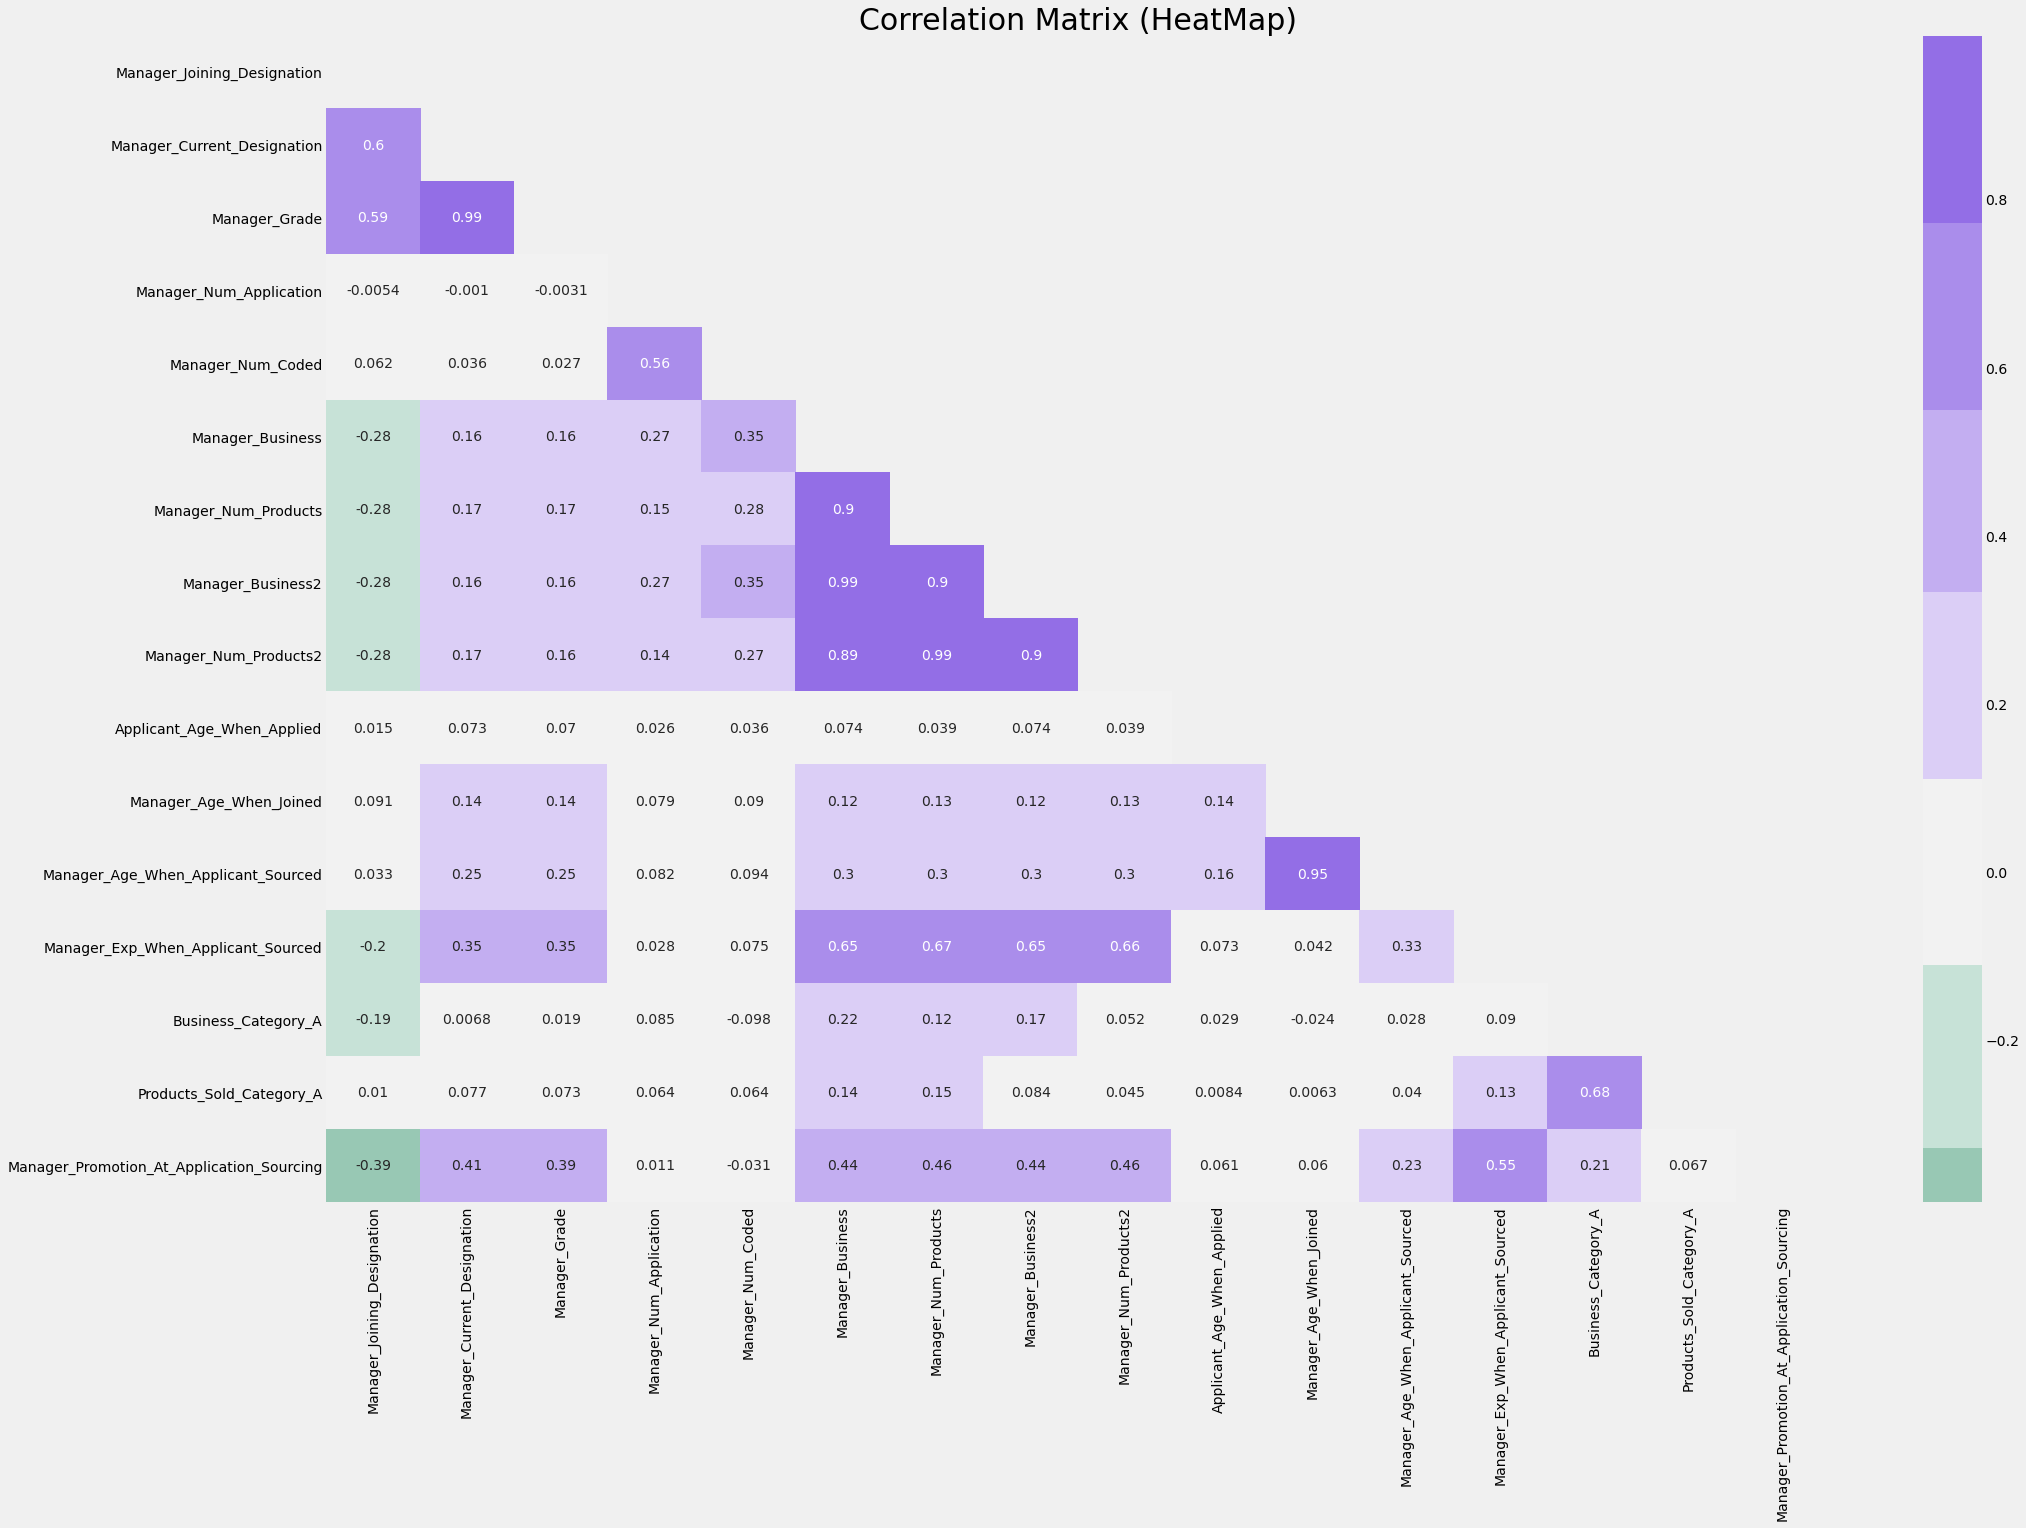

In [345]:
fig = plt.figure(figsize = [30,20])
mask = np.zeros_like(finalData.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(finalData.corr(), cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), mask = mask, annot=True, center = 0)
plt.title("Correlation Matrix (HeatMap)", fontsize = 30)

### One Hot Encoding

In [346]:
finalData = pd.get_dummies(finalData)

Now let's begin training our model

## Model Training

### Train Test Split

Splitting our Training and Validation in 80-20 proportions.

In [347]:
trainDF = finalData[:len(finalTrain)]
testDF = finalData[len(finalTrain):]
print(trainDF.shape)
print(testDF.shape)

(9527, 322)
(5045, 322)


In [348]:
trainDF.columns[trainDF.isnull().any()]

Index([], dtype='object')

In [349]:
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(trainDF.to_numpy(),
                                                                BusinessSourced.to_numpy(),test_size=0.2,random_state=1010)

In [350]:
np.unique(yTest)

array([0, 1], dtype=int64)

### XGBoost
#### Hyperparameter Tuning

In [351]:
xgbAttributes = xgb.XGBClassifier(n_jobs=-1, random_state=1010)

xgbParameters = {
      
    'max_depth' : [2,3,4,5],
    'learning_rate': [0.05, 0.1,0.15],
    'colsample_bytree' : [0.4,0.6,0.8],
    'n_estimators' : [1000,2000],
    'gamma' : [0.15,0.3,0.5],
    'subsample': [0.6,0.7,0.8], #,0.9,1
    'min_child_weight': [3,4,5],#6,10
    'scale_pos_weight': [10,20],
}

xgbModel = model_selection.RandomizedSearchCV(xgbAttributes, param_distributions = xgbParameters, cv = 5, random_state=1010)

start = time.time()
xgbModel.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training for XGBoost took {:.2f} mins'.format((end-start)/60))

xgbPred = xgbModel.predict(xTest)

Training for XGBoost took 38.81 mins


In [352]:
bestEstimator = xgbModel.best_estimator_
bestEstimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=-1, num_parallel_tree=1,
              random_state=1010, reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [353]:
yTestPred = bestEstimator.predict(xTest)
print(metrics.classification_report(yTest,yTestPred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1230
           1       0.64      0.87      0.74       676

    accuracy                           0.78      1906
   macro avg       0.78      0.80      0.78      1906
weighted avg       0.82      0.78      0.79      1906



In [354]:
XGBAvP = pd.DataFrame({'Actual':yTest, 'Predicted': xgbPred})
XGBAvP

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
1901,0,0
1902,1,1
1903,0,0
1904,1,1


In [355]:
metrics.confusion_matrix(yTest,xgbPred)

array([[903, 327],
       [ 85, 591]], dtype=int64)

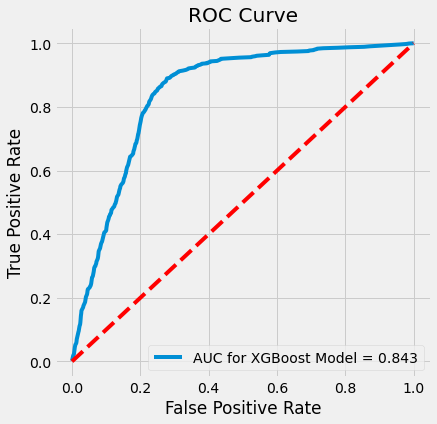

In [356]:
xgbPredProb = bestEstimator.predict_proba(xTest)[:,1]
fpr,tpr,_ = metrics.roc_curve(yTest,xgbPredProb)
rocAuc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('ROC Curve')
sns.lineplot(fpr, tpr, label = 'AUC for XGBoost Model = %0.3f' % rocAuc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LightGBM 
#### Hyperparameter Tuning

In [357]:
lgbAttributes = lgb.LGBMClassifier(objective='binary', n_jobs=-1, random_state=2020, importance_type='gain')

lgbParameters = {
    'max_depth' : [2,3,4,5],
    'learning_rate': [0.05, 0.1,0.125,0.15],
    'colsample_bytree' : [0.2,0.4,0.6,0.8,1],
    'n_estimators' : [400,500,600,700,800,900],
    'min_split_gain' : [0.15,0.20,0.25,0.3,0.35], #equivalent to gamma in XGBoost
    'subsample': [0.6,0.7,0.8,0.9,1],
    'min_child_weight': [6,7,8,9,10],
    'scale_pos_weight': [10,15,20],
    'min_data_in_leaf' : [100,200,300,400,500,600,700,800,900],
    'num_leaves' : [20,30,40,50,60,70,80,90,100]
}

lgbModel = model_selection.RandomizedSearchCV(lgbAttributes, param_distributions = lgbParameters, cv = 5, random_state=2020)

start = time.time()
lgbModel.fit(xTrain,yTrain.flatten(),feature_name=trainDF.columns.to_list())
end = time.time()

print('Training for LightGBM took {:.2f} mins'.format((end-start)/60))

lgbPred = lgbModel.predict(xTest)

Training for LightGBM took 0.38 mins


In [358]:
bestEstimatorLGB = lgbModel.best_estimator_
bestEstimatorLGB

LGBMClassifier(colsample_bytree=0.6, importance_type='gain', learning_rate=0.15,
               max_depth=3, min_child_weight=8, min_data_in_leaf=700,
               min_split_gain=0.35, n_estimators=800, num_leaves=50,
               objective='binary', random_state=2020, scale_pos_weight=10,
               subsample=0.6)

In [359]:
yTestPredLGB = bestEstimatorLGB.predict(xTest)
print(metrics.classification_report(yTest,yTestPredLGB))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1230
           1       0.59      0.94      0.72       676

    accuracy                           0.75      1906
   macro avg       0.77      0.79      0.74      1906
weighted avg       0.82      0.75      0.75      1906



In [360]:
LGBAvP = pd.DataFrame({'Actual':yTest, 'Predicted': lgbPred})
LGBAvP

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
1901,0,0
1902,1,1
1903,0,0
1904,1,1


In [361]:
metrics.confusion_matrix(yTest,lgbPred)

array([[783, 447],
       [ 39, 637]], dtype=int64)

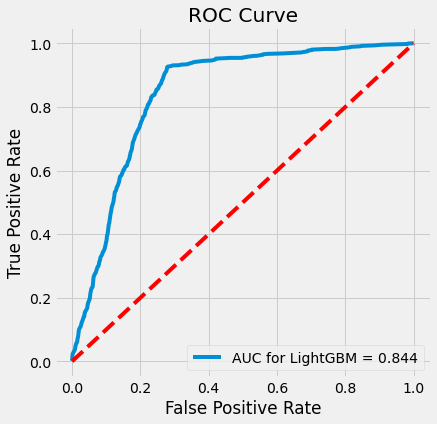

In [362]:
lgbPredProb = bestEstimatorLGB.predict_proba(xTest)[:,1]
fpr,tpr,_ = metrics.roc_curve(yTest,lgbPredProb)
rocAuc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('ROC Curve')
sns.lineplot(fpr, tpr, label = 'AUC for LightGBM = %0.3f' % rocAuc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest
#### Hyperparameter Tuning

In [369]:
rfAttributes = ensemble.RandomForestClassifier(n_jobs = -1, random_state=1010)

rfParameters = {
    'n_estimators' : [1000,1500,2000],
    'max_depth' : [5,10,15,20,25],
    'min_samples_leaf' : [4,5,6,7],
    'min_samples_split' : [5,10,15],
    'oob_score' : [True],
    'min_samples_leaf' : [2,3,4,5], 
    'min_weight_fraction_leaf' : [0,0.5]
}

rfModel = model_selection.RandomizedSearchCV(rfAttributes, param_distributions = rfParameters, cv=5, random_state = 1010)

start = time.time()
rfModel.fit(xTrain, yTrain)
end = time.time()

print('Training for Random Forest took {:.2f} mins'.format((end-start)/60))

rfPred = rfModel.predict(xTest)

Training for Random Forest took 12.29 mins


In [370]:
bestEstimatorRF = rfModel.best_estimator_
bestEstimatorRF

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=1010)

In [371]:
yTestPredRF = bestEstimatorRF.predict(xTest)
print(metrics.classification_report(yTest,yTestPredRF))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1230
           1       0.66      0.81      0.73       676

    accuracy                           0.79      1906
   macro avg       0.77      0.79      0.78      1906
weighted avg       0.81      0.79      0.79      1906



In [372]:
RFAvP = pd.DataFrame({'Actual':yTest, 'Predicted': rfPred})
RFAvP

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
1901,0,0
1902,1,1
1903,0,0
1904,1,1


In [373]:
metrics.confusion_matrix(yTest,rfPred)

array([[952, 278],
       [126, 550]], dtype=int64)

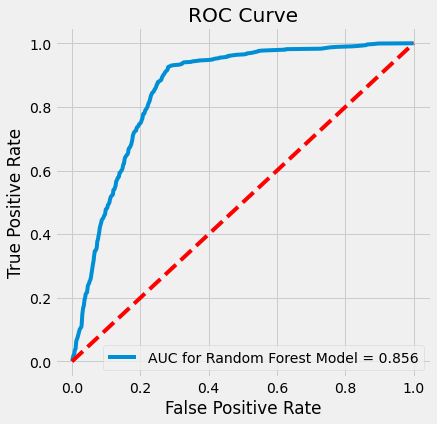

In [374]:
rfPredProb = bestEstimatorRF.predict_proba(xTest)[:,1]
fpr,tpr,_ = metrics.roc_curve(yTest,rfPredProb)
rocAuc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('ROC Curve')
sns.lineplot(fpr, tpr, label = 'AUC for Random Forest Model = %0.3f' % rocAuc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression
#### Hyperparameter Tuning

In [429]:
lr = linear_model.LogisticRegression(random_state=2020)
lrParameters = {
    "class_weight" : ['balanced'],
    "C": [100, 10, 1.0, 0.1, 0.01], 
}


lrModel = model_selection.RandomizedSearchCV(lr, param_distributions = lrParameters, cv = 5, random_state=1010)


start = time.time()
lrModel.fit(xTrain, yTrain)
end = time.time()

print('Training for Logistic Regression took {:.2f} mins'.format((end-start)/60))

lrPred = lrModel.predict(xTest)

Training for Logistic Regression took 0.22 mins


In [430]:
bestEstimatorLR = lrModel.best_estimator_
bestEstimatorLR

LogisticRegression(C=100, class_weight='balanced', random_state=2020)

In [431]:
yTestPredLR = bestEstimatorLR.predict(xTest)
print(metrics.classification_report(yTest,yTestPredLR))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1230
           1       0.65      0.90      0.75       676

    accuracy                           0.79      1906
   macro avg       0.79      0.81      0.79      1906
weighted avg       0.83      0.79      0.79      1906



In [432]:
LRAvP = pd.DataFrame({'Actual':yTest, 'Predicted': lrPred})
LRAvP

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
1901,0,0
1902,1,1
1903,0,0
1904,1,1


In [433]:
metrics.confusion_matrix(yTest,lrPred)

array([[898, 332],
       [ 68, 608]], dtype=int64)

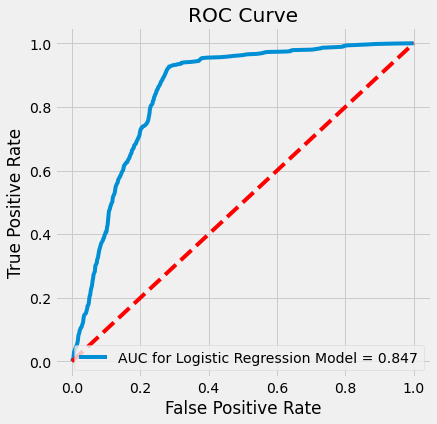

In [434]:
lrPredProb = bestEstimatorLR.predict_proba(xTest)[:,1]
fpr,tpr,_ = metrics.roc_curve(yTest,lrPredProb)
rocAuc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('ROC Curve')
sns.lineplot(fpr, tpr, label = 'AUC for Logistic Regression Model = %0.3f' % rocAuc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Stacking

In [437]:
stckAttributes = classifier.StackingCVClassifier(classifiers = (rfModel, lgbModel, xgbModel, lrModel),
                                               random_state = 1010,
                                               meta_classifier = rfModel, use_features_in_secondary = True)

start = time.time()
stckAttributes.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training for Stacking took {:.2f} mins'.format((end-start)/60))

stckPred = stckAttributes.predict(xTest)

Training for Stacking took 129.66 mins


In [438]:
stckAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(stckPred)})
stckAvP

,Actual,Predicted
0,1.000000,1.000000
1,1.000000,1.000000
2,1.000000,2.718282
3,1.000000,2.718282
4,1.000000,1.000000
...,...,...
1901,1.000000,1.000000
1902,2.718282,2.718282
1903,1.000000,1.000000
1904,2.718282,2.718282


In [439]:
metrics.confusion_matrix(yTest,stckPred)

array([[937, 293],
       [ 97, 579]], dtype=int64)

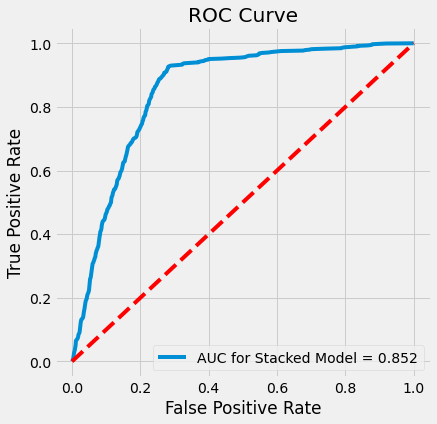

In [440]:
stckPredProb = stckAttributes.predict_proba(xTest)[:,1]
fpr,tpr,_ = metrics.roc_curve(yTest,stckPredProb)
rocAuc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('ROC Curve')
sns.lineplot(fpr, tpr, label = 'AUC for Stacked Model = %0.3f' % rocAuc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Blending

In [441]:
def blend(X):
    return((0.15*stckAttributes.predict(X)) + (0.4*lrModel.predict(X)) + (0.1*rfModel.predict(X)) + (0.25*xgbModel.predict(X))
          + (0.1*lgbModel.predict(X)))
 
blendedPred = blend(xTest)

# Submission

In [442]:
#PredictedValues = stckAttributes.predict(testDF.to_numpy())

blendedPrice = blend(testDF.to_numpy())

toSubmit = pd.DataFrame({'ID' : testID, 'Business_Sourced' : blendedPrice})

toSubmit.to_csv('Blendsubmission.csv', index=False) 



In [ ]:
#RF = 0.791
#XGB = 0.814
#LGBM = 0.789
#LR = 0.823
#Stack = 0.8095
#Blend 4 - 0.5 (lr), 0.25(xgb), 0.15(stck), 0.1(rf) = 0.839
#Blend Top3 = 0.5,0.25,0.25 = 0.837
#Blend Top3 = 0.4,0.3,0.3 = 0.837
#Blend All5 = 0.4,0.25,0.15,0.1,0.1 = 0.8403